### Import required libraries


In [70]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading heart disease data

In [71]:
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")
df = df.dropna()
display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(297, 14)


### Renaming the column names

In [72]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Checking categorical variables

In [73]:
df['cp'].value_counts()


4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

In [74]:
df['restecg'].value_counts()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

### Checking for missing values and data types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  hd        297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### Target variable: 'hd'

In [76]:
print(df['hd'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64


In [77]:
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


In [78]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,38.750842,0.730640,2.390572,94.101010,176.754209,0.367003,0.942761,112.252525,0.437710,0.787879,1.336700,0.562290,3.286195,0.461279
std,24.818501,0.444376,1.197821,59.822795,117.816094,0.482801,0.846349,71.612180,0.496942,0.742977,0.546271,0.675582,2.083294,0.499340
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,149.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,3.000000,135.000000,258.000000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


### Creating feature set and target

In [79]:
X = df.drop('hd', axis=1)
y = df[['hd']]

print(X.shape, y.shape)

(297, 13) (297, 1)


### One-hot encoding

In [80]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(X.head())
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0


(297, 19)


### Split the dataset intro train and test set

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Performing training with Decision Tree Classifier 

In [82]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

### Prediction

In [83]:
y_pred = model_DT.predict(X_test)

### Prediction Comparison with the test data

In [84]:
y_test['probability'] = np.round(model_DT.predict_proba(X_test)[:,1], 2)
y_test['predicted_hd'] = y_pred

display(y_test.sample(10))

,hd,probability,predicted_hd
232,1,0.0,0
238,0,0.0,0
172,1,1.0,1
169,0,0.0,0
157,1,1.0,1
168,1,1.0,1
183,0,1.0,1
290,1,0.0,0
221,0,1.0,1
242,0,0.0,0


### Tree Diagram of the Decision Tree

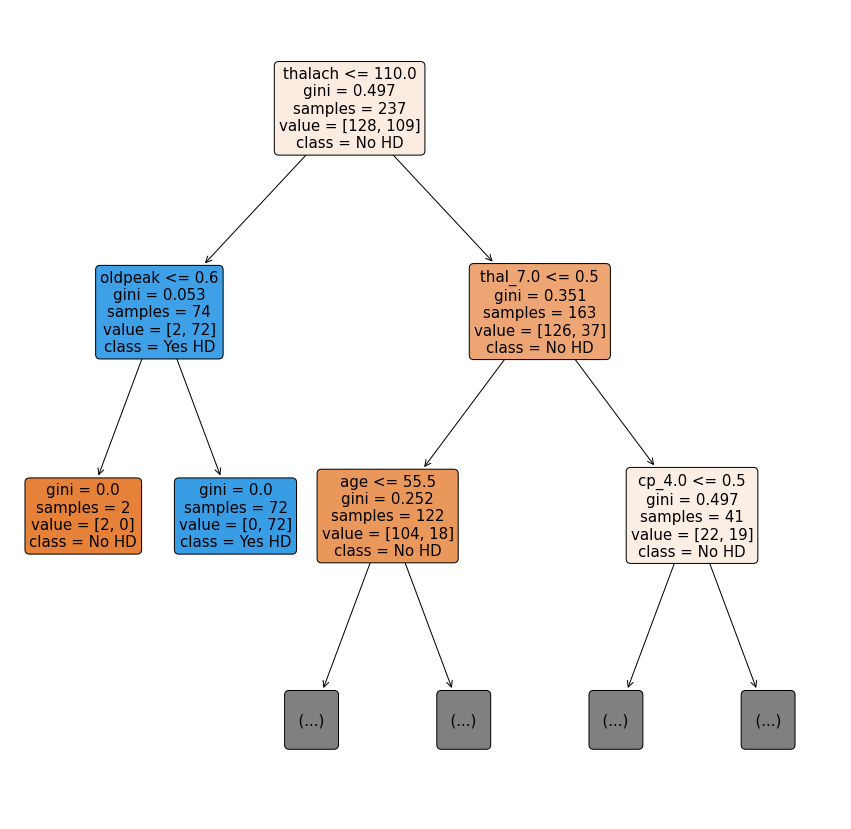

In [85]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

### Model Performance Evaluation

#### Confusion Matrix

In [86]:
confusion_matrix_ = confusion_matrix(y_test['hd'], 
                                     y_test['predicted_hd'])
print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[26  6]
 [ 5 23]]


#### Plotting Confusion Matrix

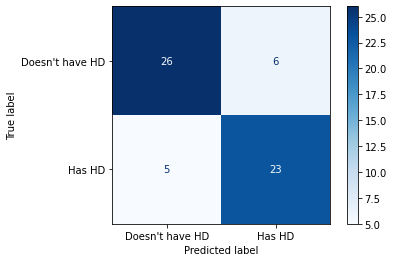

In [87]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test['hd'], 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Blues')
plt.show()

In [88]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  26
False Negatives =  5
False Positives =  6
True Positives =  23


#### Accuracy

In [89]:
accuracy_ = accuracy_score(y_test['hd'], 
                           y_test['predicted_hd'])

print('Accuracy: ', accuracy_)

Accuracy:  0.8166666666666667


### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve¶

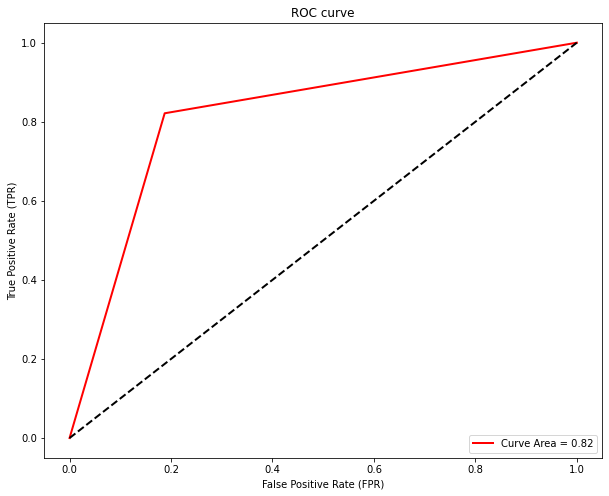

In [90]:
fpr, tpr, thr = roc_curve(y_test['hd'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['hd'], 
                             y_test['predicted_hd']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='red', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
roc_data = pd.DataFrame({"threshold": thr, "FPR": fpr, "TPR": tpr})
display(roc_data.tail(10))

,threshold,FPR,TPR
0,2.0,0.0000,0.000000
1,1.0,0.1875,0.821429
2,0.0,1.0000,1.000000


### Classification report

In [92]:
class_report = classification_report(y_test['hd'], 
                                     y_test['predicted_hd'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



From the above classification report which is based on Decision Tree Classifier , the accuracy of the model is 82% which is pretty good.
Someother KPI like precision, recall, f1-score for both class-0 & class-1 are also around 80%
So, overall the model is performing well.
